In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tweepy
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
# Twitter API Keys
consumer_key = "7xy8Y9idclPxi4SluDxxuRVoQ"
consumer_secret = "L6Mw9c27q8nUIW0c5sF8o0qAV7QCsv8tqEpYR5bKtqcE3W6rqQ"
access_token = "906340601829851136-upXhJ8ahxI95FYlAQHWivFFO4515Y8a"
access_token_secret = "iSa1fb0Ff4unJ0zPzabUlUBIL29Y3zyEhmLocMBEraA7K"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [21]:
target_users = ["BBC","CBC","CNN","FoxNews","nytimes"]

In [22]:
# List for holding sentiments
sentiments =[]

In [23]:
# Loop through target users
for user in target_users:
    tweet_number = 0
    public_tweets = api.user_timeline(user, count = 100)
    
    
    for tweet in public_tweets:
        
        #Run the Vader analysis on each tweet.
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text = tweet["text"]
        tweets_ago = tweet_number
        timestamp = tweet['created_at']
        converted_timestamp = datetime.strptime(timestamp, '%a %b %d %H:%M:%S %z %Y').date()
        
        #Create a dictionary of sentiments
        sentiments.append({"News Source" : user,
                           "Date": converted_timestamp,
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets ago": tweet_number,
                           "Tweet Text": tweet_text})
        tweet_number+=1

 

In [24]:
#create a data frame
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets ago
0,0.0000,2018-03-21,0.000,1.000,BBC,0.000,Watch as @ZoeTheBall attempts to cycle over 30...,0
1,-0.5994,2018-03-21,0.163,0.837,BBC,0.000,Who were my parents - and why was I left on a ...,1
2,0.4249,2018-03-21,0.000,0.865,BBC,0.135,😍🍫You really can't go wrong with a recipe from...,2
3,0.4939,2018-03-21,0.000,0.868,BBC,0.132,Is it too late to save the oceans from plastic...,3
4,0.4019,2018-03-21,0.000,0.886,BBC,0.114,"RT @bbcmusic: Anne-Marie, Kylie Minogue, Ladys...",4


In [25]:
BBC_df = news_sentiments.loc[news_sentiments["News Source"] == "BBC",:]
CBC_df = news_sentiments.loc[news_sentiments["News Source"] == "CBC",:]
FoxNews_df = news_sentiments.loc[news_sentiments["News Source"] == "FoxNews",:]
CNN_df = news_sentiments.loc[news_sentiments["News Source"] == "CNN",:]
Nytimes_df = news_sentiments.loc[news_sentiments["News Source"]=="nytimes",:]

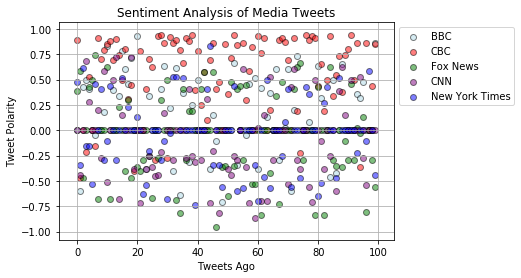

In [38]:
#Scatter plots
BBC_plot = plt.scatter(x=BBC_df['Tweets ago'], y=BBC_df['Compound'],marker="o",c='lightblue', edgecolors="black",alpha=0.5, label= "BBC")
CBC_plot = plt.scatter(x= CBC_df['Tweets ago'], y= CBC_df['Compound'], marker = "o", c = 'red', edgecolors='black',alpha=0.5, label = "CBC")
Fox_plot = plt.scatter(x= FoxNews_df['Tweets ago'], y= FoxNews_df['Compound'], marker = "o", c = 'green', edgecolors='black',alpha=0.5, label = "Fox News")
CNN_plot = plt.scatter(x= CNN_df['Tweets ago'], y= CNN_df['Compound'], marker = "o", c = 'purple', edgecolors='black',alpha=0.5, label = "CNN")
Nytimes_plot = plt.scatter(x= Nytimes_df['Tweets ago'], y= Nytimes_df['Compound'], marker = "o", c = 'blue', edgecolors='black',alpha=0.5, label = "New York Times")




#Add legend
plt.legend(bbox_to_anchor = (1,1))


#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

#Adding size
fig = plt.figure(figsize=(20, 10))

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()
 
 

In [27]:
#export Data Frame into csv
news_sentiments.to_csv("News_Sentiments.csv")

In [28]:
# get the overall sentiment per media and store it in a dataframe
sentiment_overall = news_sentiments.groupby('News Source').agg({'Compound': np.mean}).reset_index() 
sentiment_overall

,News Source,Compound
0,BBC,0.127989
1,CBC,0.520248
2,CNN,-0.082066
3,FoxNews,-0.053442
4,nytimes,-0.032378


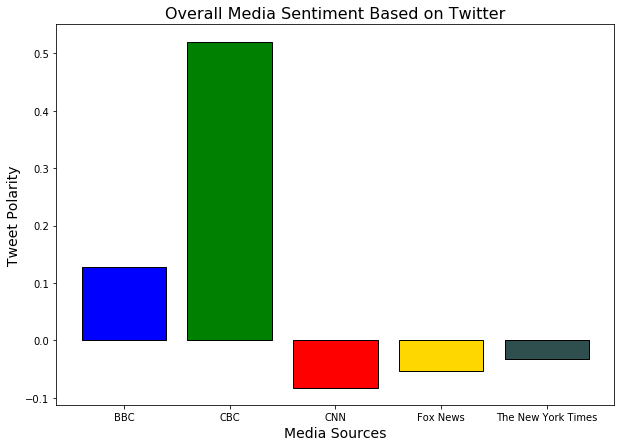

In [29]:
#set the axis
x_axis = np.arange(len (sentiment_overall['News Source']))
avg_compound = sentiment_overall['Compound']

#set figure size
plt.figure(figsize=(10,7))

#set colors
colors = {"BBC": "blue", "CBC": "green", "CNN": "red", 
          "FoxNews": "gold", "nytimes": "darkslategray"}

#plot bar
# Plot bars
sentiment_bar= plt.bar(x_axis, avg_compound, color = sentiment_overall['News Source'].map(colors), 
                  edgecolor='black', alpha=1, align="edge")

# Place tick locations and label
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBC", "CNN", "Fox News", "The New York Times"])

# Labels
plt.title('Overall Media Sentiment Based on Twitter', fontsize=16)
plt.xlabel('Media Sources', fontsize=14)
plt.ylabel('Tweet Polarity', fontsize=14)

# Save and show
plt.savefig('media_overall.png')
plt.show()
